# Neural & Behavioral Modeling - Week 1 (Exercises)
by 駱皓正(Hao-Cheng Lo)(austenpsy@gmail.com)

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 Party Simulation (5 points)
This is a model of a cocktail party. The men and women at the party form groups. A party-goer becomes uncomfortable and switches groups if their current group has too many members of the opposite sex. What types of group result?

### 1.1 Insert your codes to complete the simulation (2 points)

2.3589434400200844


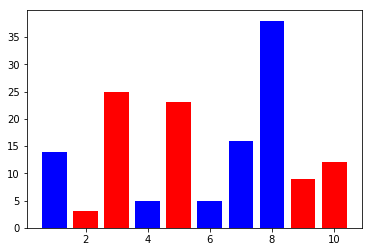

In [2]:
import timeit

#see the time start
start = timeit.default_timer()

# Model parameters:
Ngroups=10
Npeople=150  
Tolerance=.28 # tolerable propotion of the opposite sex

# Supporting functions:
class Person:
    def __init__(self, Ngroups):
        self.sex = random.randint(2) # 0=woman; 1=man
        self.Ngroups=Ngroups
        self.group = random.randint(Ngroups) # staying in which group?
        
    def leave(self):
        options=delete(arange(self.Ngroups),self.group) # except the current group
        self.group = int(random.choice(options,1)) # choosing a new group
    
def party_stats(people): # calculate the number of men & women in each group
    Npeople=len(people)    
    sexes=[people[i].sex for i in range(Npeople)]
    groups=[people[i].group for i in range(Npeople)]
    counts=zeros((max(groups)+1,max(sexes)+1))
    proportions=counts.copy()
    for p in range(Npeople):
        counts[groups[p],sexes[p]]+=1
    men_plus_women=sum(counts,1) # number of men and women in each group
    men_plus_women[men_plus_women==0]=inf # to avoid "dividing by zeros later
    proportions[:,0]=counts[:,0]/men_plus_women # proportion of women in each group
    proportions[:,1]=counts[:,1]/men_plus_women # proportion of men in each group
    return counts, proportions # size=group*sex

def plot_party(counts):
    x=arange(len(counts))+1 # number of groups
    clf() # clear previous figure
    bar(x, counts[:,0], color = 'r') # women
    bar(x, counts[:,1], color = 'b', bottom = counts[:,0]) # men on top of women in the plot
    display(gcf()); clear_output(wait=True) # to allow dynamic plots
    
# Initialization:
people = [Person(Ngroups) for i in range(Npeople)] # assign each person to a group
Nhappy=0 # Number of happy people


# Simulation:
while(Nhappy<Npeople): # Simulation stops when everyone is happy
    Nhappy=0 # recounting after a new move

    # Insert your codes here to make everyone happy:
    # checking each person
    for i in people:
        # cal the status of each group
        SGroup = party_stats(people)
        
        # if the ratio of the opp. sex in i-th person >= toler.
        if SGroup[1][i.group][(i.sex+1)%2] >= Tolerance:
            i.leave() #i-th person leaves
        else:
            Nhappy += 1 #if not then indicates the i-th person satisfying about the current state
    
    # people = [Person(Ngroups) for i in range(Npeople)] 
    # !! Remove this line !!
    
    # Plot new results:
    counts, proportions=party_stats(people) # size=group*sex
    plot_party(counts)

    #check the end time
    stop = timeit.default_timer()
    
    if stop - start >= 15:
        print("no converge")
        break

print(stop - start)

### 1.2 Modify the three model parameters & discuss how each affects convergence of the simulation (2 points)

W/O automatically tuning parameters with grid process, all combinations of $T = \left \{ .15, .20, .25 \right \}$, $G = \left \{ 2, 5, 10 \right \}$, and $P = \left \{ 50, 100, 150 \right \}$ were manually tested. If the running time was more than 15 sec, no convergence would be declared.

Results showed that the more # of group or tolerance and the less # of people, the runtime be faster.

### 1.3 Discuss why the simulaiton leads to group polarization (1 point)

WLOG, tolerance is always less than .5. Given a arbitrary codition of a group $G$. In $G$, a male person $p$ will face 2 conditions A, B.

For A, female rate is more than tolerance. $p$ will leave and the female rate will strickly increase for $G$.

For B, female rate is not more than tolerance. Concurrently, for a female person $p'$ will leave. The male rate will strickly increase for $G$.

Thus, the group polarization occurs.

## 2 Understand Shunting Equation (5 points)

$\frac{dy}{dt}=-Ay+(B-y)*E-(y-C)*I$

### 2.1 Find its equilibrium by analytically solving $dy/dt=0$ (1 point)

Write your answer here with [LaTex](https://www.sharelatex.com/learn/Mathematical_expressions) formula

$\frac{dy }{d t} = 0$

$\int \frac{dy }{d t} dt = \int 0 dt$

$y = c1$

### 2.2 Use Euler integration to verify your answer in 2.1 with your own (A, B, C, E, I) constants (2 points)


Eq(y(t), C1)


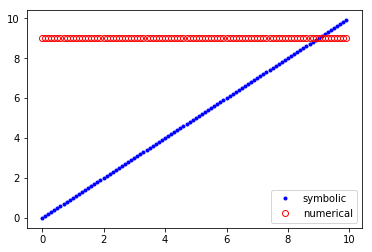

In [3]:
# Write your simulation codes here
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

c,t = sym.symbols('c,t')
y = sym.Function('y')(t) #y(t)
sol = sym.dsolve(y.diff()-0*y) # solving dy/dt=0*y
print(sol)

#by Euler integration
dt=.1 # usually set to .1 or even less = delta t
c1=random.randint(10)
y=[c1] # randomly set 5 = c1
t=np.arange(0,10,dt) # 0 dt 2dt 3dt ... <10
for i in t:
    y1=y[-1] # the last element
    y2=y1+dt*(0) # Euler integration
    y.append(y2)
plt.plot(t,t,'b.'); # true answer; plot t & t^2 using b. format
plt.plot(t,y[0:-1],'ro',markerfacecolor='None') # approximation
plt.legend(['symbolic','numerical']);

### 2.3 Combining math & if-then controls in numerical integrations (2 points)

Use Euler integration to plot $dy/dt=-y(t)+E$ where
$E=\begin{cases}
    1  &  \text{if } t<5\\
    0  &  \text{if } t>5
   \end{cases}$
for t=[0,10] & y(t=0)=0.

This is an example of time-varying rather than constant excitation.

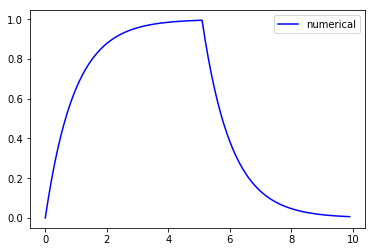

In [4]:
# Write your simulation codes here
#by Euler integration
dt=.1 # usually set to .1 or even less = delta t
y=[0] 
t=np.arange(0,10,dt) # 0 dt 2dt 3dt ... <10
for i in t:
    y1=y[-1] # the last element
    if i > 5:
        y2=y1+dt*(-y1) # Euler integration
    else:
        y2=y1+dt*(-y1+1)
    y.append(y2)
#plt.plot(t,t,'b.'); # true answer
plt.plot(t,y[0:-1],'b',markerfacecolor='None') # approximation
plt.legend(['numerical']);